Found 90 images belonging to 6 classes.
Found 30 images belonging to 6 classes.
Epoch 1/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.1216 - loss: 3.3701 - val_accuracy: 0.2667 - val_loss: 2.3514 - learning_rate: 1.0000e-04
Epoch 2/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.2291 - loss: 3.0762 - val_accuracy: 0.3000 - val_loss: 2.2307 - learning_rate: 1.0000e-04
Epoch 3/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 975ms/step - accuracy: 0.2795 - loss: 2.9135 - val_accuracy: 0.4000 - val_loss: 2.1175 - learning_rate: 1.0000e-04
Epoch 4/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 974ms/step - accuracy: 0.2235 - loss: 3.1308 - val_accuracy: 0.4000 - val_loss: 2.0130 - learning_rate: 1.0000e-04
Epoch 5/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 910ms/step - accuracy: 0.3111 - loss: 2.4023 - val_accuracy: 0.4333 - val_loss: 1.9126 - learning_rate: 1.0000e-04
Epoch 6/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 990ms/step - accuracy: 0.2906 - loss: 2.3084 - val_accuracy: 0.4667 - val_loss: 1.8155 - learning_rate: 1.0000e-04
Ep

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Classification Report:

              precision    recall  f1-score   support

        acai       1.00      1.00      1.00         5
     cupuacu       1.00      1.00      1.00         5
    graviola       1.00      1.00      1.00         5
     guarana       1.00      1.00      1.00         5
     pupunha       1.00      1.00      1.00         5
      tucuma       1.00      1.00      1.00         5

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



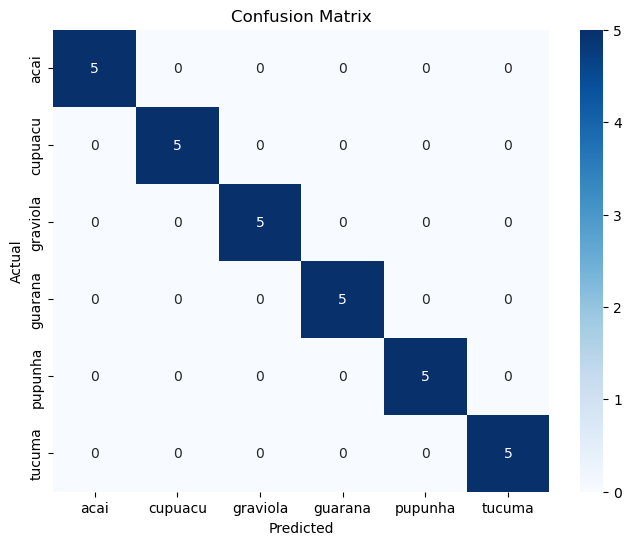

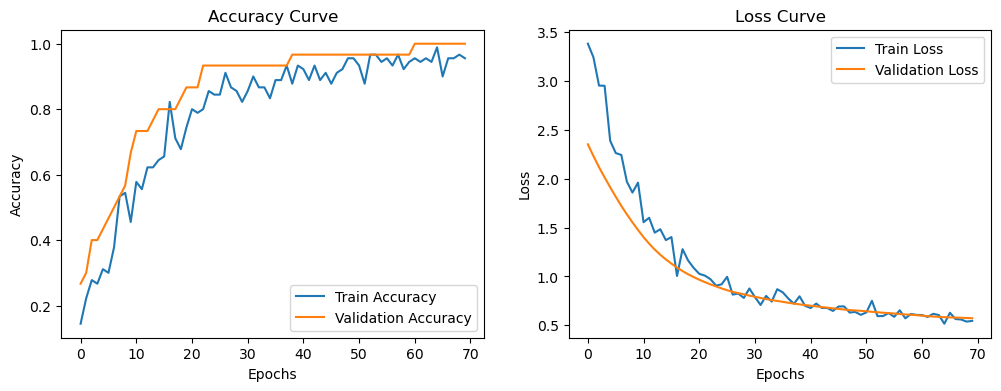


Sample Inference Results:
True: acai, Predicted: acai
True: acai, Predicted: acai
True: acai, Predicted: acai
True: acai, Predicted: acai
True: acai, Predicted: acai
True: cupuacu, Predicted: cupuacu
True: cupuacu, Predicted: cupuacu
True: cupuacu, Predicted: cupuacu
True: cupuacu, Predicted: cupuacu
True: cupuacu, Predicted: cupuacu


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
import os

# Dataset paths
train_dir = r"C:\Users\Amit khatri\ 6CS012 AI ML\FruitinAmazon\FruitinAmazon\train"
test_dir = r"C:\Users\Amit Khatri\ 6CS012 AI ML\FruitinAmazon\FruitinAmazon\test"

# Image and training settings
img_size = (224, 224)
batch_size = 32
epochs = 70

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')

test_data = test_datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False)

# Base Model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Build model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')
])

# Compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train
history = model.fit(train_data, validation_data=test_data, epochs=epochs,
                    callbacks=[early_stop, reduce_lr])

# Save model
model.save("fruit_classification_model_v2.h5")

# Evaluate and visualize
y_true = test_data.classes
y_pred_probs = model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)
class_labels = list(test_data.class_indices.keys())

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot Training Performance
plt.figure(figsize=(12,4))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")

plt.show()

# Optional: Preview sample predictions
print("\nSample Inference Results:")
for i in range(10):
    print(f"True: {class_labels[y_true[i]]}, Predicted: {class_labels[y_pred[i]]}")


Found 90 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


<>:77: SyntaxWarning: invalid escape sequence '\ '
<>:77: SyntaxWarning: invalid escape sequence '\ '
C:\Users\Rachit Poudel\AppData\Local\Temp\ipykernel_9264\3755025532.py:77: SyntaxWarning: invalid escape sequence '\ '
  print("\n\ Classification Report:")


Epoch 1/150


C:\Users\Rachit Poudel\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 984ms/step - accuracy: 0.1742 - loss: 2.7474 - val_accuracy: 0.3000 - val_loss: 1.6456
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 285ms/step - accuracy: 0.4370 - loss: 1.4912 - val_accuracy: 0.5333 - val_loss: 1.1644
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - accuracy: 0.6648 - loss: 1.0356 - val_accuracy: 0.6667 - val_loss: 0.8040
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step - accuracy: 0.7878 - loss: 0.5325 - val_accuracy: 0.7667 - val_loss: 0.6647
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - accuracy: 0.8875 - loss: 0.3589 - val_accuracy: 0.8333 - val_loss: 0.5728
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 309ms/step - accuracy: 0.9694 - loss: 0.2156 - val_accuracy: 0.8333 - val_loss: 0.5311
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 269ms/step - accuracy: 0.9944 - loss: 0.1633 - val_accuracy: 0.8000 - val_loss: 0.5218
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step - accuracy: 0.9646 - loss: 0.1042 - val_accuracy: 0.8000 - val_loss: 0.5

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

\ Classification Report:
              precision    recall  f1-score   support

        acai       0.75      0.60      0.67         5
     cupuacu       0.83      1.00      0.91         5
    graviola       0.83      1.00      0.91         5
     guarana       0.71      1.00      0.83         5
     pupunha       1.00      0.80      0.89         5
      tucuma       1.00      0.60      0.75         5

    accuracy                           0.83        30
   macro avg       0.86      0.83      0.83        30
weighted avg       0.86      0.83      0.83        30


 Sample Predictions:
True: acai, Predicted: acai
True: acai, Predicted: acai
True: acai, Predicted: graviola
True: acai, Predicted: cupuacu
True: acai, Predicted: acai
True: cupuacu, Predicted: cupuacu
True: cupuacu, Predicted: cupuacu
True: cupuacu, Predicted: cupuacu
True: cupuacu, Predicted: cupuacu
True: cupuacu, Predicted: cupuacu


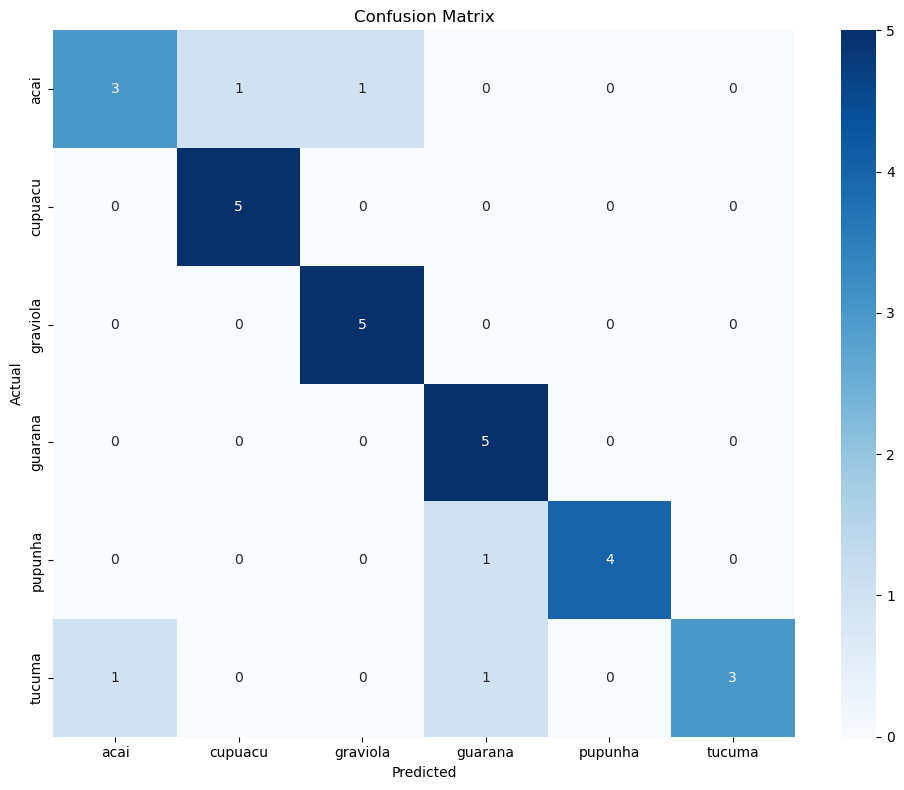

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Constants
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 150

# Paths (cleaned)
base_path = r"C:\Users\Amit Khatri\ 6CS012 AI ML\FruitinAmazon\FruitinAmazon"
train_dir = os.path.join(base_path, "train")
val_dir = os.path.join(base_path, "test")

# Data Generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Load MobileNetV2 without top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze base model

# Custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

# Evaluate
val_loss, val_acc = model.evaluate(val_generator)
print(f"\n Validation Accuracy: {val_acc:.4f}")

# Predictions
y_true = val_generator.classes
y_probs = model.predict(val_generator)
y_pred = np.argmax(y_probs, axis=1)

# Labels
class_labels = list(val_generator.class_indices.keys())

# Classification Report
print("\n\ Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Inference examples
print("\n Sample Predictions:")
for i in range(10):
    print(f"True: {class_labels[y_true[i]]}, Predicted: {class_labels[y_pred[i]]}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
